# Session 1: Tuesday, July 15, 2:00 pm - 3:30 pm (1h30)
1. Introduction to PyTorch (some slides or few images integrated in this notebook)
2. Pytorch Basics :
   * Tensor creation and manipulation
   * Run calculations on CPU/GPU
   * Basics for creating a model (Class nn.Module, init and forward function)
   * Basics for train and test (how to set up loss function and optimizer,  turn model in inference mode for testing)

### Part 1: Introduction to tensors

Pytorch only manipulates data in Tensor format, so we need to create our data directly in this format, or convert it if it's in numpy array or dataframe format, for example.

Tensor data can be scalar, vector , matrix or tensor.

## What is a tensor?

In [31]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [32]:
# !pip install torch torchvision

import torch #framework package
import torchvision

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

PyTorch version: 2.6.0+cu124
CUDA available: False


In [33]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [34]:
# Vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [35]:
# Matrix
Matrix = torch.tensor([[7, 8],
                       [9, 10]])
Matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [36]:
# Tensor
Tensor = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
Tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

To know the size and dimension of Tensor variables, you can use shape and ndim functions
Matrix: A 2-dimensional (2D) array of numbers.
Example: a table with rows and columns.

Tensor: A generalization of matrices to n-dimensions.
So:

Scalar = rank-0 tensor (single number)

Vector = rank-1 tensor (1D array)

Matrix = rank-2 tensor (2D array)

Higher-order tensors = 3D, 4D, … nD arrays

In [37]:
# Dimension
print("scalar dim :", scalar.ndim)
print("vector dim :", vector.ndim)
print("Matrix dim :", Matrix.ndim)
print("Tensor dim :", Tensor.ndim)

# Size
print("scalar size :", scalar.shape)
print("vector size :", vector.shape)
print("Matrix size :", Matrix.shape)
print("Tensor size :", Tensor.shape)

scalar dim : 0
vector dim : 1
Matrix dim : 2
Tensor dim : 3
scalar size : torch.Size([])
vector size : torch.Size([2])
Matrix size : torch.Size([2, 2])
Tensor size : torch.Size([1, 3, 3])


For scalars, this is a single value, so the Tensor format considers it to be a dimensionless and sizeless tensor (in the "mathematical" sense).

The size function returns the size of each dimension


*   For matrices, first the height, then the width
*   For tensors, first the depth (in the case of an image, the number of channels), then the height, then the width.)

## B] Tensor datatypes

There are many different tensor datatypes available in PyTorch : https://docs.pytorch.org/docs/stable/tensors.html#data-types

The most common type (and generally the default) is torch.float32 or torch.float. This is referred to as "32-bit floating point".

You can also have torch.int32, i.e. arrays of integers, and torch.bool, i.e. Booleans.

64-bit formats such as torch.int64 and torch.float64 are also very common.

In [38]:
Matrix.dtype

torch.int64

In [39]:
float_64_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float64)

float_64_tensor.dtype

torch.float64

In [40]:
boolean = torch.tensor([True, False, True])
boolean.dtype

torch.bool

## C] Manipulating tensors

### a) Create random tensors or tensors filled with 0 or 1

In [41]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor

tensor([[0.9644, 0.5409, 0.5784, 0.0311],
        [0.0962, 0.9263, 0.9304, 0.0256],
        [0.0391, 0.2151, 0.4460, 0.8322]])

In [42]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor

tensor([[[0.1659, 0.6949, 0.2305],
         [0.3855, 0.2829, 0.0811],
         [0.1184, 0.2311, 0.9383],
         ...,
         [0.4401, 0.5949, 0.7896],
         [0.3287, 0.3333, 0.6332],
         [0.9353, 0.3017, 0.5748]],

        [[0.8525, 0.1581, 0.9811],
         [0.6779, 0.0481, 0.4751],
         [0.4075, 0.9321, 0.2453],
         ...,
         [0.1273, 0.3791, 0.7962],
         [0.3512, 0.6796, 0.6162],
         [0.8139, 0.6633, 0.7325]],

        [[0.2083, 0.0907, 0.6457],
         [0.0837, 0.7994, 0.5007],
         [0.7296, 0.5079, 0.8006],
         ...,
         [0.1961, 0.7038, 0.9102],
         [0.8661, 0.6596, 0.5420],
         [0.7386, 0.3842, 0.4681]],

        ...,

        [[0.6514, 0.6245, 0.3068],
         [0.6486, 0.8427, 0.7523],
         [0.6568, 0.0812, 0.9026],
         ...,
         [0.8674, 0.0736, 0.2022],
         [0.1173, 0.9671, 0.7921],
         [0.0560, 0.8889, 0.4477]],

        [[0.4912, 0.7814, 0.2575],
         [0.4970, 0.7630, 0.6235],
         [0.

In [43]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [44]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### b) Creating a range and tensors like

You might want a range of numbers, such as 1 to 10 or 0 to 100.

You can use torch.arange(start, end, step) to do this.

In [45]:
# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### c) Basic operations

In [47]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [48]:
# Multiply it by 10
tensor * 10

tensor([10, 20, 30])

In [49]:
# /!\ Be careful: Tensors don't change unless reassigned
tensor

tensor([1, 2, 3])

In [50]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [51]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

In [52]:
# Can also use torch functions
print(tensor)
print(torch.multiply(tensor, 10))
print(torch.mul(tensor, 10)) # torch.mul is a shortcut for multiply
print(torch.add(tensor, 10))

# However, it's more common to use the operator symbols like * instead of torch.mul()
print(tensor * tensor)

tensor([1, 2, 3])
tensor([10, 20, 30])
tensor([10, 20, 30])
tensor([11, 12, 13])
tensor([1, 4, 9])


PyTorch implements matrix multiplication functionality in the torch.matmul() method.


Or you can use the operator symbols @, but the in-built torch.matmul() method is faster

In [53]:
print(torch.matmul(tensor, tensor))
print(tensor @ tensor)

tensor(14)
tensor(14)


### d) Indexing (selecting data from tensors)

In [54]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [55]:
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [56]:
# You can also use : to specify "all values in this dimension" and then use a comma (,) to add another dimension.

# Get all values of 0th dimension and the 0 index of 1st dimension
print(x[:, 0])
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
print(x[:, :, 1])
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
print(x[:, 1, 1])
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
print(x[0, 0, :]) # same as x[0][0]

tensor([[1, 2, 3]])
tensor([[2, 5, 8]])
tensor([5])
tensor([1, 2, 3])


### e) PyTorch tensors & NumPy

Since NumPy is a popular Python numerical computing library, PyTorch has functionality to interact with it nicely.

The two main methods you'll want to use for NumPy to PyTorch (and back again) are:

*   torch.from_numpy(ndarray) - NumPy array -> PyTorch tensor.
*   torch.Tensor.numpy() - PyTorch tensor -> NumPy array.# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

In [57]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [58]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## C] Running tensors on GPUs
By default these operations are often done on a CPU, if you have a GPU, it will enable you to perform calculations faster.

To do this, the variables must be stored on the GPU.

In [59]:
# Check if a variables are on GPU or CPU
tensor.device

device(type='cpu')

In [60]:
# Check for GPU
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

PyTorch version: 2.6.0+cu124
CUDA available: False


In order to activate CUDA, go to "Settings" and in "accelerator" select "GPU"

In [61]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [62]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu, tensor_on_gpu.device

(tensor([1., 1., 1., 1., 1., 1., 1.]), device(type='cpu'))

### Moving tensors back to the CPU
For example, you'll want to do this if you want to interact with your tensors with NumPy (NumPy does not leverage the GPU).

In [63]:
# If tensor is on GPU, can't transform it to NumPy (this will error)
#tensor_on_gpu.numpy()

Instead, to get a tensor back to CPU and usable with NumPy we can use Tensor.cpu().

This copies the tensor to CPU memory so it's usable with CPUs.

In [64]:
# Instead, copy the tensor back to cpu
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)

# Part 2: Basics of neural networks

A neuron is a function that satisfies this equation:

y = weight * X + bias

* x corresponds to input data
* y to prediction
* weight and bias are the parameters to be learned by the model

## A] Linear regression by hand

In [65]:
import torch
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Python is a modular language, meaning that everything is created in module form (i.e. a block of code that can be reused). To define a module that can be recalled later, we use the Class format.

Python packages (including Pytorch) are already created as modules (Class) and can be reused by modifying them to suit our needs.

Let's take the example of linear regression.

In [66]:
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)

    # Initialise model parameters to be used in various computations
    def __init__(self):
        super().__init__() # Means that we use what is already defined in nn.module

        self.weights = nn.Parameter(torch.randn(1, # start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float),
                                   requires_grad=True) # means PyTorch willtrack the gradients of this specific parameter for use with torch.autograd and gradient descent

        self.bias = nn.Parameter(torch.randn(1, # start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float),
                                requires_grad=True)


    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [67]:
# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [68]:
# We can also get the state (what the model contains) of the model
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## B] Making predictions using torch.inference_mode()

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined in this method.

`torch.inference_mode()` turns off things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the `forward()` method) faster.

First, let's divide the data into the train and test categories.

In [69]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [70]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


PyTorch contains a function that already implements linear regression, so you can redefine our model like this:

In [71]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model_0 = LinearRegressionModel()
print(model_0)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


## C] Train model
To improve results, you need to train the model, i.e. update the parameters. To do this, we'll need to add a few more things to our recipe.

And that's a loss function as well as an optimizer

* Measures how wrong your model's predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.
* Tells your model how to update its internal parameters to best lower the loss.

In [72]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)
# params = parameters of target model to optimize
# lr = learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

For training we need to implement the backpropagation, here an example on one simple tensor

In [73]:
# Autograd example
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3 * x + 4

# Compute gradients i.e. backpropagation
y.backward()

print("dy/dx:", x.grad)  # Should be 2x + 3 => 2*2 + 3 = 7

dy/dx: tensor(7.)


Now it's time to creating 2 optimization loop :

* The training loop involves the model going through the training data and learning the relationships between the features and labels.
* The testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data (the model never sees the testing data during training).

In [74]:
# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.4566597044467926 | MAE Test Loss: 0.902740478515625 
Epoch: 10 | MAE Train Loss: 0.3415392339229584 | MAE Test Loss: 0.7685304880142212 
Epoch: 20 | MAE Train Loss: 0.2548103630542755 | MAE Test Loss: 0.6518100500106812 
Epoch: 30 | MAE Train Loss: 0.20335504412651062 | MAE Test Loss: 0.5596543550491333 
Epoch: 40 | MAE Train Loss: 0.17333532869815826 | MAE Test Loss: 0.48786434531211853 
Epoch: 50 | MAE Train Loss: 0.15608887374401093 | MAE Test Loss: 0.4337606430053711 
Epoch: 60 | MAE Train Loss: 0.14575017988681793 | MAE Test Loss: 0.3929426670074463 
Epoch: 70 | MAE Train Loss: 0.13897857069969177 | MAE Test Loss: 0.3625188171863556 
Epoch: 80 | MAE Train Loss: 0.13399270176887512 | MAE Test Loss: 0.33869674801826477 
Epoch: 90 | MAE Train Loss: 0.12999269366264343 | MAE Test Loss: 0.320896714925766 


## D] Saving and loading a PyTorch model
For saving and loading models in PyTorch, there are three main methods you should be aware of :

* torch.save -->	Saves a serialized object to disk using Python's pickle utility. Models, tensors and various other Python objects like dictionaries can be saved using torch.save.
* torch.load -->	Uses pickle's unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc).
* torch.nn.Module.load_state_dict -->	Loads a model's parameter dictionary (model.state_dict()) using a saved state_dict() object.

In [75]:
# SAVE
MODEL_SAVE_PATH = "model.pth"
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

In [76]:
# LOAD
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [77]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [78]:
# Compare previous model predictions with loaded model predictions (these should be the same)
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Session 2: Tuesday, July 15, 4:00 pm - 5:30 pm (1h30)
1. Load and preprocessing of existing dataset (Normalisation, standardization, split in train/test, cross validation...)
2. Train and test on different models (which ones?)
3. Request an assignments for the next session ? (if yes, what ?)

## Download existing dataset and examine the different variables

CO2 Emissions in Africa from 2000 -2020. The data contains a collection of key metrics from notable sources.

License: World Bank Dataset Terms of Use

This Dataset includes the following features:

1. Country
2. Country code,
3. Sub-region
4. Year
5. GDP PER CAPITA (USD)
6. Population
7. Area (Km2)
8. Population
9. CO2 Emissions
    I. Transportation (Mt)
    II. Total CO2 Emission including LUCF (Mt)
    III. Total CO2 Emission excluding LUCF (Mt)
    IV. Other Fuel Combustion (Mt)
    V. Manufacturing/Construction (Mt)
    VI.  Land-Use Change and Forestry (Mt)
    VII. Industrial Processes (Mt)
    VIII. Energy (Mt)
    IX. Fugitive Emissions (Mt)
    X. Electricity/Heat (Mt)
    XI. Bunker Fuels (Mt)
    XII. Building (Mt)

In [79]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# drive.mount('/content/drive')

# df = pd.read_csv("/content/drive/My Drive/Easy_pytorch/co2_Emission_Africa.csv")\
df = pd.read_csv('/content/co2_Emission_Africa.csv')
df.head()



,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


Data preparation
* Remove undefined value (mark NaN or NA)
* Standardize data
* Convert to Tensor format (because it's acutally a numpy array)
* Split in train/test dataset
* Use of `DataLoader`

In [80]:
#check shape
df.shape


(1134, 20)

In [81]:
df.columns

Index(['Country', 'Sub-Region', 'Code', 'Year', 'Population',
       'GDP PER CAPITA (USD)', 'GDP PER CAPITA PPP (USD)', 'Area (Km2)',
       'Transportation (Mt)', 'Total CO2 Emission including LUCF (Mt)',
       'Total CO2 Emission excluding LUCF (Mt)', 'Other Fuel Combustion (Mt)',
       'Manufacturing/Construction (Mt)', 'Land-Use Change and Forestry (Mt)',
       'Industrial Processes (Mt)', 'Fugitive Emissions (Mt)', 'Energy (Mt)',
       'Electricity/Heat (Mt)', 'Bunker Fuels (Mt)', 'Building (Mt)'],
      dtype='object')

In [82]:
df.describe()

,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
count,1134.000000,1.134000e+03,1107.000000,1086.000000,1.134000e+03,1122.000000,1134.000000,1134.000000,1122.000000,1122.000000,1134.000000,1072.000000,330.000000,1134.000000,1122.000000,1122.000000,1122.000000
mean,2010.000000,1.975236e+07,2220.015953,5106.329926,5.564746e+05,4.913164,41.243289,20.818968,0.434394,2.548387,20.424577,1.114981,4.567152,19.765159,9.272451,0.753788,1.454635
std,6.057972,2.877802e+07,2971.760298,5989.405811,5.983822e+05,10.844025,89.057762,62.186060,1.190362,7.805355,66.859781,2.919895,7.963444,60.348813,38.468534,1.895787,4.303603
min,2000.000000,8.113100e+04,110.460000,420.270000,4.520000e+02,0.010000,-10.410000,0.050000,0.000000,0.000000,-24.950000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,2005.000000,2.384106e+06,526.280000,1468.582500,5.678500e+04,0.360000,2.772500,0.810000,0.000000,0.060000,0.105000,0.000000,0.322500,0.782500,0.090000,0.050000,0.040000
50%,2010.000000,1.078683e+07,1009.490000,2544.630000,3.322315e+05,1.065000,14.110000,2.715000,0.030000,0.320000,6.420000,0.080000,1.800000,2.560000,0.305000,0.150000,0.120000
75%,2015.000000,2.359457e+07,2538.470000,6072.067500,9.237680e+05,2.937500,39.772500,7.777500,0.190000,1.460000,17.350000,0.632500,4.762500,7.207500,2.145000,0.640000,0.530000
max,2020.000000,2.083274e+08,19849.720000,33261.870000,2.381741e+06,59.450000,606.390000,448.300000,8.680000,61.100000,601.260000,22.820000,52.490000,443.390000,311.550000,14.790000,33.970000


In [83]:
# country with the highest GDP
highest_gdp_country = df.loc[df['GDP PER CAPITA (USD)'].idxmax()]['Country']
print("Country with the highest GDP:", highest_gdp_country)

Country with the highest GDP: Equatorial Guinea


In [84]:
df.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,14.75,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,11.86,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,10.20,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,12.17,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,11.22,84.60,31.75,2.19,11.52


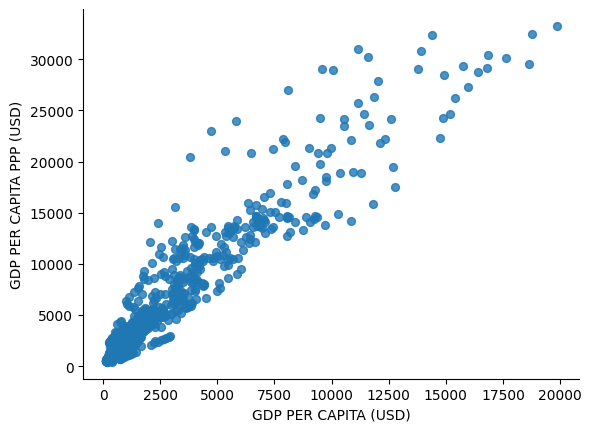

In [85]:
# @title GDP PER CAPITA (USD) vs GDP PER CAPITA PPP (USD)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='GDP PER CAPITA (USD)', y='GDP PER CAPITA PPP (USD)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

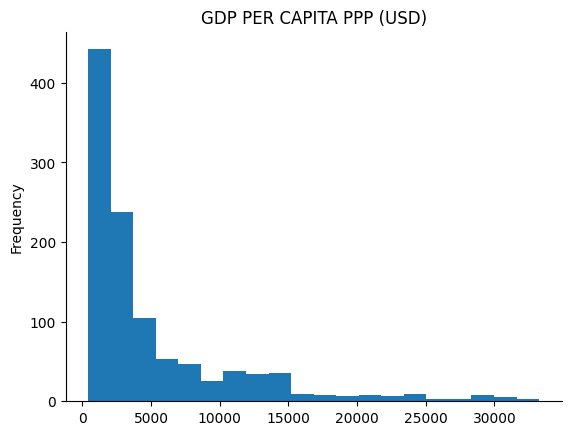

In [86]:
# @title GDP PER CAPITA PPP (USD)

from matplotlib import pyplot as plt
df['GDP PER CAPITA PPP (USD)'].plot(kind='hist', bins=20, title='GDP PER CAPITA PPP (USD)')
plt.gca().spines[['top', 'right',]].set_visible(False)

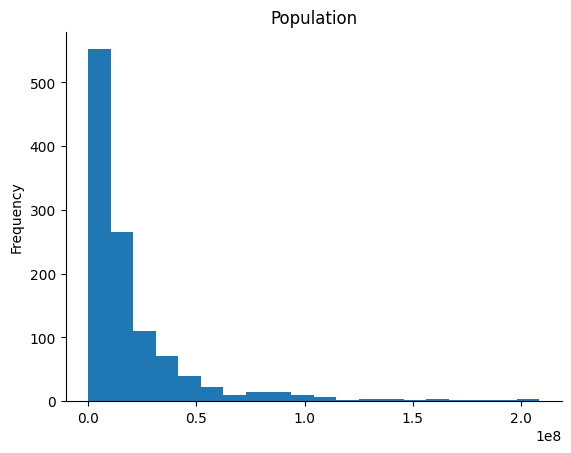

In [87]:
# @title Population

from matplotlib import pyplot as plt
df['Population'].plot(kind='hist', bins=20, title='Population')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [88]:
# check rows of country Kenya
kenya_Shit = df[df['Country'] == 'Kenya']
kenya_Shit.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Fugitive Emissions (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
504,Kenya,Eastern Africa,KEN,2000,30851606,411.82,1893.76,580367,2.71,4.33,8.63,0.33,1.50,-4.30,0.57,NaN,8.06,2.19,1.54,1.33
505,Kenya,Eastern Africa,KEN,2001,31800343,408.36,1949.67,580367,2.67,23.05,7.88,0.32,1.62,15.17,0.57,NaN,7.31,1.59,1.64,1.11
506,Kenya,Eastern Africa,KEN,2002,32779823,401.09,1931.39,580367,2.79,22.83,7.66,0.27,1.79,15.17,0.66,NaN,7.01,1.13,1.59,1.02
507,Kenya,Eastern Africa,KEN,2003,33767122,441.39,1967.99,580367,2.50,22.01,6.84,0.21,1.54,15.17,0.77,NaN,6.06,1.02,1.70,0.79
508,Kenya,Eastern Africa,KEN,2004,34791836,462.62,2061.42,580367,2.76,22.83,7.66,0.22,1.72,15.17,0.86,NaN,6.80,1.16,1.87,0.94


In [89]:
#checking for missing values
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'MissingValues']
missing_values


,Column,MissingValues
0,Country,0
1,Sub-Region,0
2,Code,0
3,Year,0
4,Population,0
5,GDP PER CAPITA (USD),27
6,GDP PER CAPITA PPP (USD),48
7,Area (Km2),0
8,Transportation (Mt),12
9,Total CO2 Emission including LUCF (Mt),0


In [90]:
#drop column with more than 50% missing data
df = df.loc[:, df.isnull().mean() < 0.5]
df.columns
df.shape

(1134, 19)

In [91]:
# Fill numeric columns with mean
df_filled = df.fillna(df.mean(numeric_only=True))
print("\nAfter filling missing values with mean:\n", df_filled.isnull().sum())


After filling missing values with mean:
 Country                                   0
Sub-Region                                0
Code                                      0
Year                                      0
Population                                0
GDP PER CAPITA (USD)                      0
GDP PER CAPITA PPP (USD)                  0
Area (Km2)                                0
Transportation (Mt)                       0
Total CO2 Emission including LUCF (Mt)    0
Total CO2 Emission excluding LUCF (Mt)    0
Other Fuel Combustion (Mt)                0
Manufacturing/Construction (Mt)           0
Land-Use Change and Forestry (Mt)         0
Industrial Processes (Mt)                 0
Energy (Mt)                               0
Electricity/Heat (Mt)                     0
Bunker Fuels (Mt)                         0
Building (Mt)                             0
dtype: int64


In [92]:
df_filled

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.00,6.16,0.57,3.79,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.00,6.25,-2.41,3.77,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.00,6.62,-2.41,4.06,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.00,7.01,-2.41,4.03,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.00,8.09,-2.41,4.90,84.60,31.75,2.19,11.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Zimbabwe,Eastern Africa,ZWE,2016,14452704,1421.79,2724.45,390757,2.15,97.61,10.45,0.66,1.06,87.16,0.46,9.99,5.90,0.12,0.22
1130,Zimbabwe,Eastern Africa,ZWE,2017,14751101,1192.11,2331.78,390757,2.21,96.94,9.78,0.66,1.09,87.16,0.47,9.31,5.13,0.16,0.22
1131,Zimbabwe,Eastern Africa,ZWE,2018,15052184,2269.18,2457.31,390757,2.84,98.23,11.07,0.79,1.14,87.16,0.56,10.51,5.50,0.19,0.24
1132,Zimbabwe,Eastern Africa,ZWE,2019,15354608,1421.87,2296.85,390757,2.51,97.35,10.19,0.78,1.08,87.16,0.47,9.71,5.10,0.16,0.24


In [94]:
#save a copy of the cleaned data
df_filled.to_csv('/content/sample_data/co2_Emission_Africa_cleaned.csv', index=False)

In [96]:
#load cleaned data
data=pd.read_csv('/content/sample_data/co2_Emission_Africa_cleaned.csv')
data.head()

,Country,Sub-Region,Code,Year,Population,GDP PER CAPITA (USD),GDP PER CAPITA PPP (USD),Area (Km2),Transportation (Mt),Total CO2 Emission including LUCF (Mt),Total CO2 Emission excluding LUCF (Mt),Other Fuel Combustion (Mt),Manufacturing/Construction (Mt),Land-Use Change and Forestry (Mt),Industrial Processes (Mt),Energy (Mt),Electricity/Heat (Mt),Bunker Fuels (Mt),Building (Mt)
0,Algeria,Northern Africa,DZA,2000,30774621,1780.38,8510.36,2381741,16.85,80.62,80.05,0.0,6.16,0.57,3.79,76.26,29.17,1.96,9.33
1,Algeria,Northern Africa,DZA,2001,31200985,1754.58,8840.67,2381741,17.04,76.24,78.65,0.0,6.25,-2.41,3.77,74.88,30.20,1.98,9.53
2,Algeria,Northern Africa,DZA,2002,31624696,1794.81,9354.22,2381741,19.36,80.00,82.40,0.0,6.62,-2.41,4.06,78.35,32.28,2.17,9.89
3,Algeria,Northern Africa,DZA,2003,32055883,2117.05,10088.09,2381741,21.76,85.78,88.19,0.0,7.01,-2.41,4.03,84.16,32.53,1.89,10.68
4,Algeria,Northern Africa,DZA,2004,32510186,2624.80,10653.34,2381741,22.03,87.09,89.49,0.0,8.09,-2.41,4.90,84.60,31.75,2.19,11.52


In [97]:
# Compute correlation matrix (only numeric columns)
corr_matrix = df.corr(numeric_only=True)

#print("Correlation matrix:\n", corr_matrix)

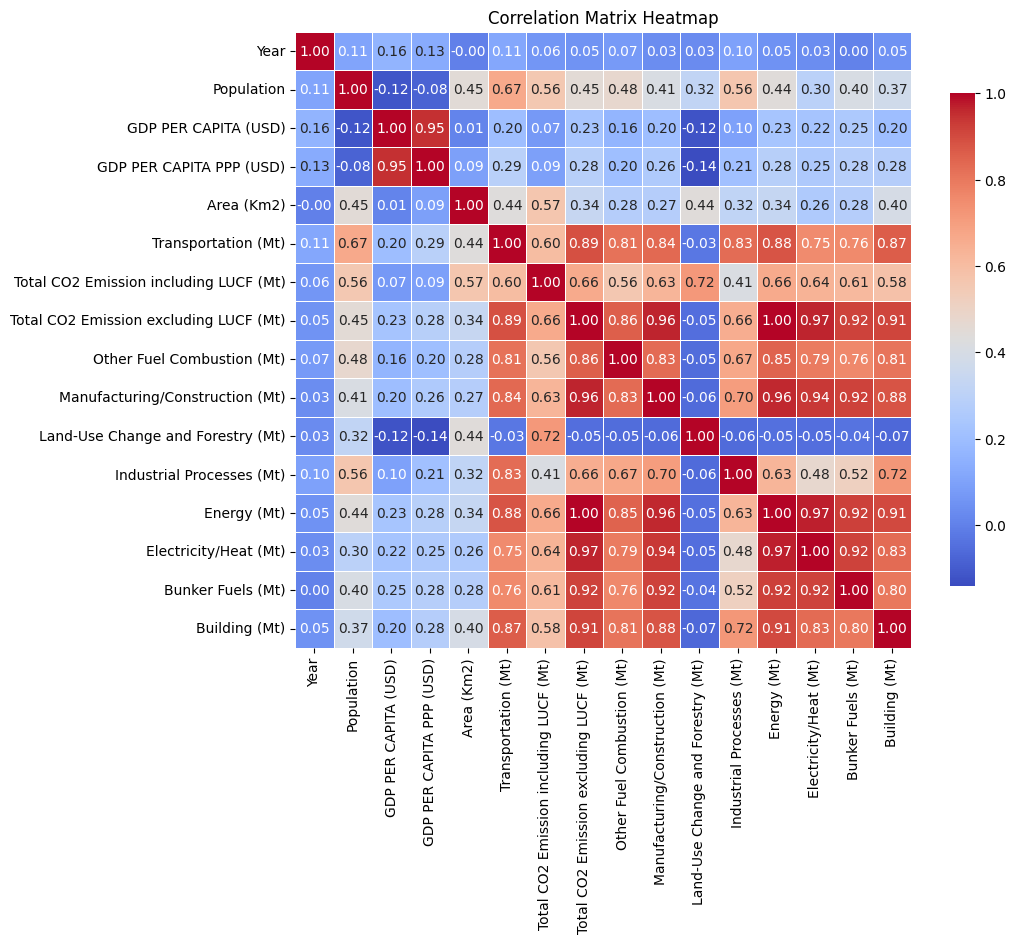

In [98]:
#visuallise with heat map
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values
    fmt=".2f",         # Format floats
    cmap='coolwarm',   # Color palette
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title('Correlation Matrix Heatmap')
plt.show()

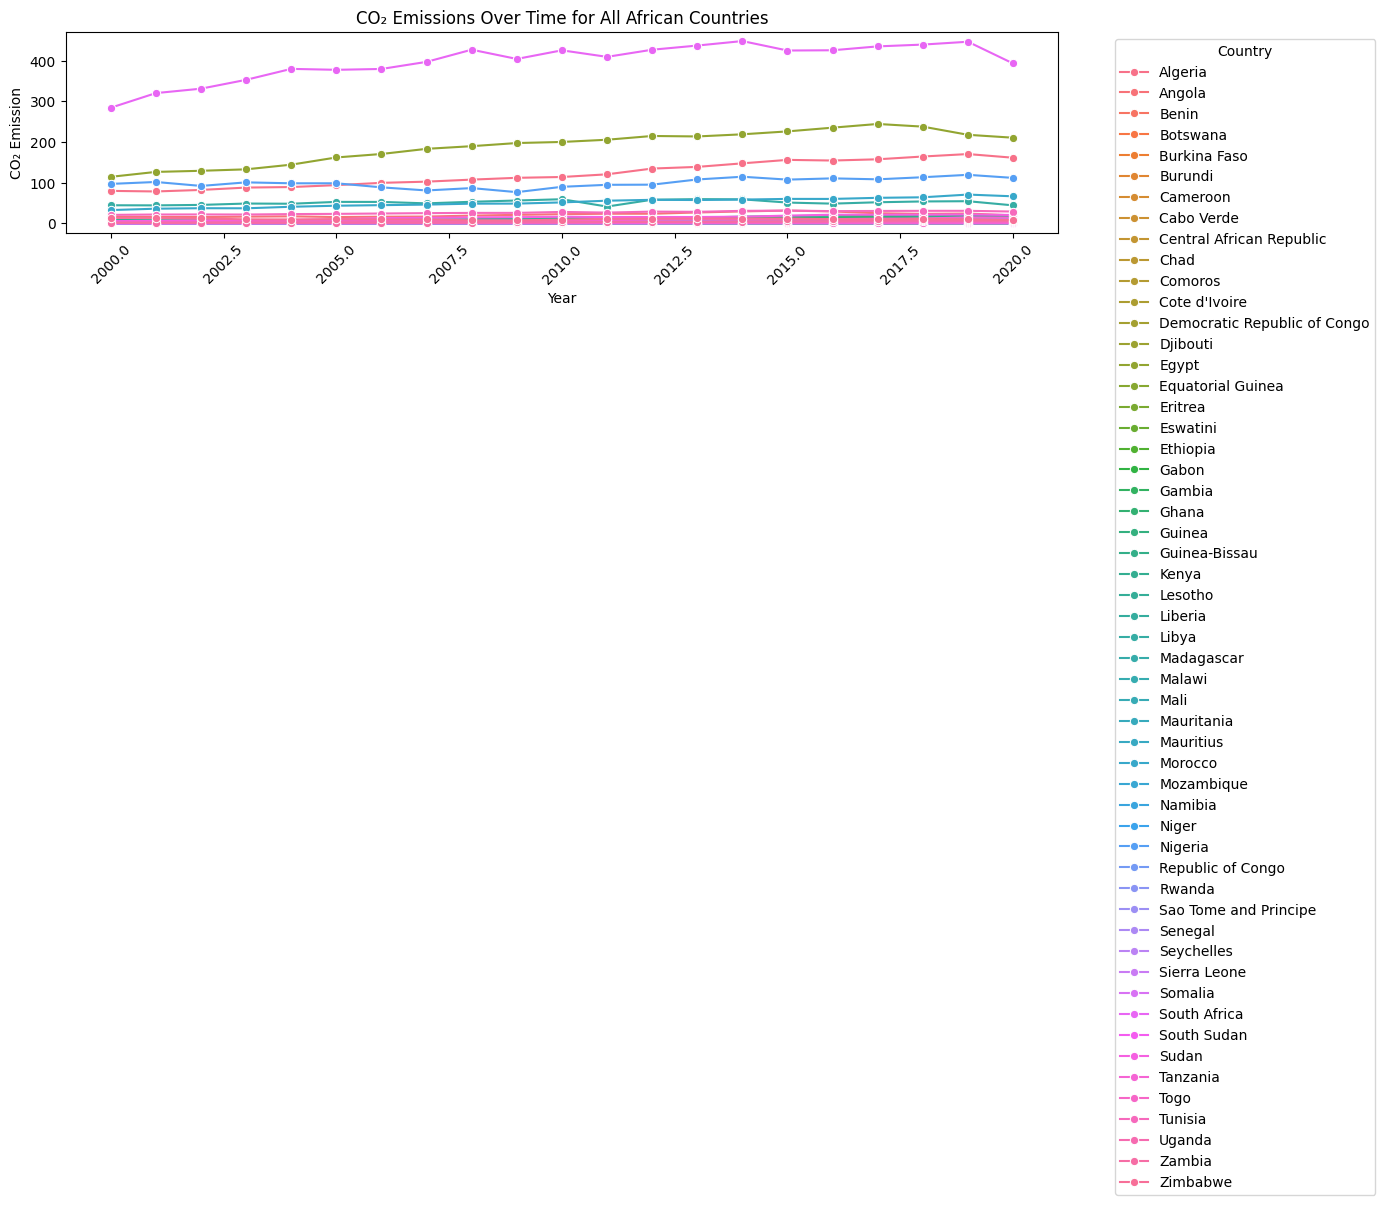

In [99]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=df,
    x='Year',
    y='Total CO2 Emission excluding LUCF (Mt)',
    hue='Country',
    marker='o'
)

plt.title('CO₂ Emissions Over Time for All African Countries')
plt.xlabel('Year')
plt.ylabel('CO₂ Emission')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


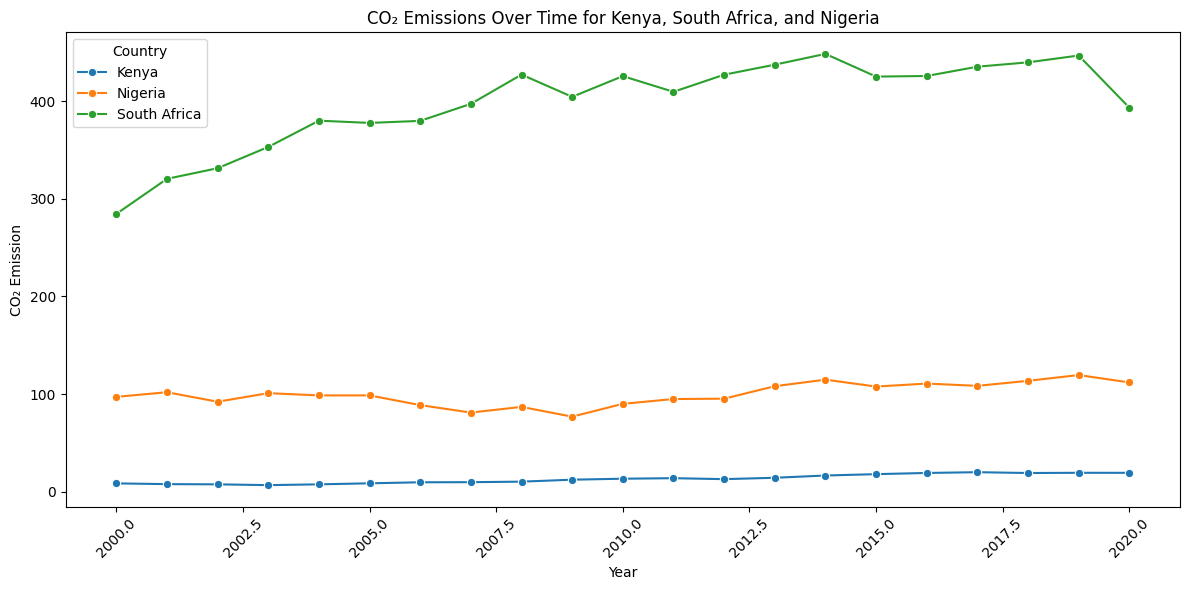

In [100]:
countries = ['Kenya', 'South Africa', 'Nigeria']
df_filtered = df[df['Country'].isin(countries)]
#print(df_filtered.head())
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df_filtered,
    x='Year',
    y='Total CO2 Emission excluding LUCF (Mt)',
    hue='Country',
    marker='o'
)

plt.title('CO₂ Emissions Over Time for Kenya, South Africa, and Nigeria')
plt.xlabel('Year')
plt.ylabel('CO₂ Emission')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:

#print("data shape before removing undefined value", df.shape)
#data = df[['GDP PER CAPITA (USD)', 'Total CO2 Emission excluding LUCF (Mt)']].dropna()
#print("data shape after removing undefined value", data.shape)
X = data['Transportation (Mt)']
y = data['Total CO2 Emission excluding LUCF (Mt)']

In [102]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

Hum... Something wrong. The error message warns us that `StandardScaler` requires matrices, whereas our `X` variable is a vector. We need to add a dimension and the message advises us to use `.reshape(-1,1)`. BUT `sklearn` uses numpy arrays by default, and our variable X is a dataframe. So `.reshape(-1,1)` won't work. We need to use `.values.reshape()` instead.

In [103]:
print("X shape:", X.shape)
print("X dimension:", X.ndim)
print("X type:", type(X))

X = X.values.reshape(-1, 1)

print("new X shape:", X.shape)
print("new X dimension:", X.ndim)
print("new X type:", type(X))

X shape: (1134,)
X dimension: 1
X type: <class 'pandas.core.series.Series'>
new X shape: (1134, 1)
new X dimension: 2
new X type: <class 'numpy.ndarray'>


Using `X.reshape(-1, 1)` means : "we want to reshape X, into an array of `-1` rows and `1` column". `-1` it the equivalent of saying "take the dimension of the vector" (here 1107). So now `StandardScaler()` will work.

In [104]:
X_scaled = scaler.fit_transform(X)

But now `X` and `X_scaled` are numpy arrays. If you want to keep an dataframe format, you have to change the way you defines `X`.

In [105]:
# X = data['GDP PER CAPITA (USD)']  # --> Create a pandas series (1107,), thus a vector
X = data[['GDP PER CAPITA (USD)']] # --> Create a dataframe which always a matrice
y = data['Total CO2 Emission excluding LUCF (Mt)']

print("X shape:", X.shape)
print("X type:", type(X))

X_scaled = scaler.fit_transform(X)

print("new X shape:", X_scaled.shape)
print("new X type:", type(X_scaled))

X shape: (1134, 1)
X type: <class 'pandas.core.frame.DataFrame'>
new X shape: (1134, 1)
new X type: <class 'numpy.ndarray'>


We can compares the impact of this operation on the dataset.

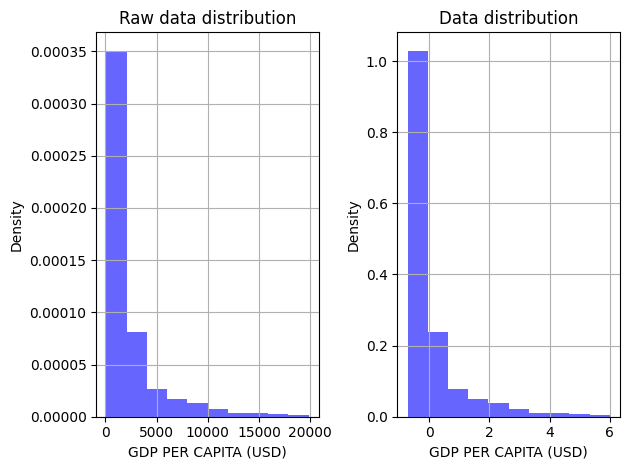

In [106]:
plt.figure()
plt.subplot(121)
plt.title("Raw data distribution")
plt.xlabel("GDP PER CAPITA (USD)")
plt.ylabel('Density')
plt.hist(X, density=True, alpha=0.6, color='blue')
plt.grid(True)
plt.tight_layout()

plt.subplot(122)
plt.hist(X_scaled, density=True, alpha=0.6, color='blue')
plt.title("Data distribution")
plt.xlabel("GDP PER CAPITA (USD)")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()

plt.show()

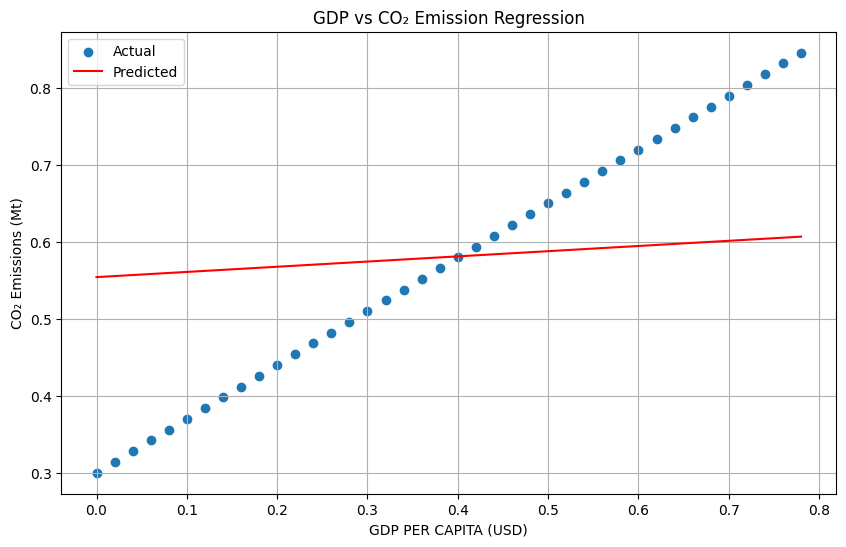

In [107]:
# Convert to numpy for plotting
X_cpu = X_train.cpu().numpy()
y_cpu = y_train.cpu().numpy()
y_pred_cpu = y_pred.detach().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_cpu, y_cpu, label="Actual")
plt.plot(X_cpu, y_pred_cpu, color="red", label="Predicted")
plt.xlabel("GDP PER CAPITA (USD)")
plt.ylabel("CO₂ Emissions (Mt)")
plt.title("GDP vs CO₂ Emission Regression")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# from

# INSIGHTS

In [ ]:
df_new = df.copy()

In [ ]:
# Choose two countries (change as needed)
countries = ["Kenya", "Ethiopia","Uganda","Tanzania","Somalia","South Sudan","Sudan","Burundi","Rwanda"]

# Filter the dataset for selected countries
df_selected = df_new[df_new["Country"].isin(countries)]

# Plot CO₂ Emissions Trends Over Time
plt.figure(figsize=(12, 6))
lineplot=sns.lineplot(data=df_selected, x="Year", y="Total CO2 Emission excluding LUCF (Mt)", hue="Country", marker="o")

# Customize the plot
plt.title("CO2 Emissions Trend for East Africa Countries")
plt.xlabel("Year")
plt.ylabel("Total CO2 Emission (Mt)")
plt.legend(title="Country")
plt.grid(True)
plt.savefig("lineplot.png")
plt.show()

In [ ]:
# plot GDP Per Capita for east African Countries
countries = ["Kenya", "Ethiopia","Uganda","Tanzania","Somalia","South Sudan","Sudan","Burundi","Rwanda"]

# Filter the dataset for selected countries
df_selected = df_new[df_new["Country"].isin(countries)]

# plot population growth over time for the selected countries
plt.figure(figsize=(12, 6))
lineplot=sns.lineplot(data=df_selected, x="Year", y="GDP PER CAPITA (USD)", hue="Country", marker="o")
plt.title("GDP Per Capita for East Africa Countries")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita (USD)")
plt.legend(title="Country")
plt.grid(True)
plt.savefig("lineplot.png")
plt.show()


In [ ]:
# # plot GDP Per Capita for east African Countries
countries = ["Kenya", "Ethiopia","Uganda","Tanzania","Somalia","South Sudan","Sudan","Burundi","Rwanda"]

# Filter the dataset for selected countries
df_selected = df_new[df_new["Country"].isin(countries)]

# plot population growth over time for the selected countries
plt.figure(figsize=(12, 6))
lineplot=sns.lineplot(data=df_selected, x="Year", y="Population", hue="Country", marker="o")
plt.title("Population Growth for East Africa Countries")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.grid(True)
plt.show()


In [ ]:
df_new.head()

In [ ]:
df_new.columns

In [ ]:
# # plot GDP Per Capita for east African Countries
countries = ["Kenya", "Ethiopia","Uganda","Tanzania","Somalia","South Sudan","Sudan","Burundi","Rwanda"]

# Filter the dataset for selected countries
df_selected = df_new[df_new["Country"].isin(countries)]

# plot population growth over time for the selected countries
plt.figure(figsize=(12, 6))
lineplot=sns.lineplot(data=df_selected, x="Year", y="Energy (Mt)", hue="Country", marker="o")
plt.title("Energy Production for East Africa Countries")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.grid(True)
plt.show()


In [ ]:
# # plot GDP Per Capita for east African Countries
countries = ["Kenya", "Ethiopia","Uganda","Tanzania","Somalia","South Sudan","Sudan","Burundi","Rwanda"]

# Filter the dataset for selected countries
df_selected = df_new[df_new["Country"].isin(countries)]

# plot population growth over time for the selected countries
plt.figure(figsize=(12, 6))
lineplot=sns.lineplot(data=df_selected, x="Year", y="Electricity/Heat (Mt)", hue="Country", marker="o")
plt.title("Electricity Production for East Africa Countries")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country")
plt.grid(True)
plt.show()


# MOdel Creation

In [109]:



class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output feature

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [112]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
epochs = 500

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)
    train_loss_values.append(loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
        test_loss_values.append(test_loss.item())

        if epoch % 10 == 0:
          epoch_count.append(epoch)
          print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.05005595088005066 | MAE Test Loss: 0.046265799552202225
Epoch: 10 | MAE Train Loss: 0.03423678129911423 | MAE Test Loss: 0.07295100390911102
Epoch: 20 | MAE Train Loss: 0.030542626976966858 | MAE Test Loss: 0.07019148021936417
Epoch: 30 | MAE Train Loss: 0.027096528559923172 | MAE Test Loss: 0.06260587275028229
Epoch: 40 | MAE Train Loss: 0.023657720535993576 | MAE Test Loss: 0.0543334074318409
Epoch: 50 | MAE Train Loss: 0.02022406831383705 | MAE Test Loss: 0.046747736632823944
Epoch: 60 | MAE Train Loss: 0.0167929045855999 | MAE Test Loss: 0.03847518563270569
Epoch: 70 | MAE Train Loss: 0.013354102149605751 | MAE Test Loss: 0.03020266816020012
Epoch: 80 | MAE Train Loss: 0.009922139346599579 | MAE Test Loss: 0.022617006674408913
Epoch: 90 | MAE Train Loss: 0.006489286664873362 | MAE Test Loss: 0.014344465918838978
Epoch: 100 | MAE Train Loss: 0.003050482366234064 | MAE Test Loss: 0.006071913056075573
Epoch: 110 | MAE Train Loss: 0.002504781587049365 | MAE

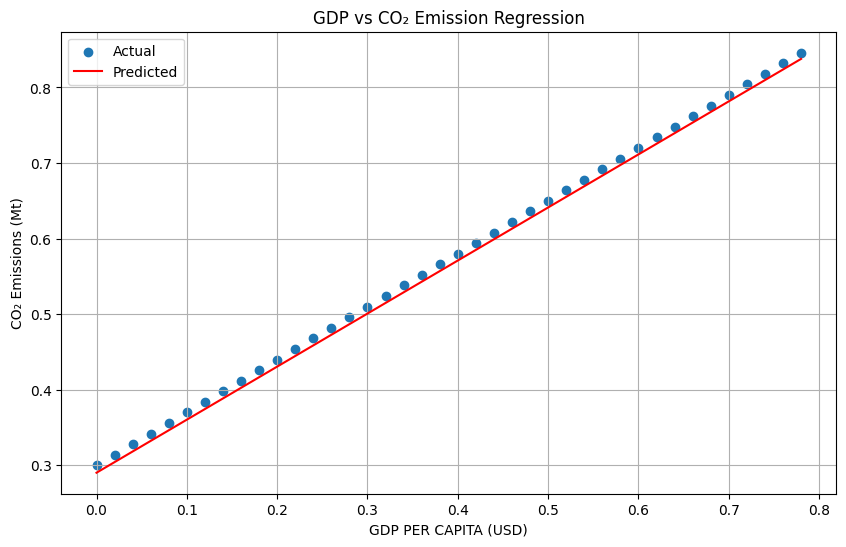

In [114]:
# convert to numpy for plotting
X_cpu = X_train.cpu().numpy()
y_cpu = y_train.cpu().numpy()
y_pred_cpu = y_pred.detach().numpy()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_cpu, y_cpu, label="Actual")
plt.plot(X_cpu, y_pred_cpu, color="red", label="Predicted")
plt.xlabel("GDP PER CAPITA (USD)")
plt.ylabel("CO₂ Emissions (Mt)")
plt.title("GDP vs CO₂ Emission Regression")
plt.legend()
plt.grid(True)
plt.show()